## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [386]:
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

import urllib.request

## Datos

In [387]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = 0)
df.index.name = None # quitamos el nombre al index

## Exploración de los datos

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


mirar si hay unknow - no hay nulos - mirar si hay duplicados

In [389]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [390]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [391]:
len(df[df.duplicated])
print("El dataset tiene", len(df[df.duplicated]), "duplicados")
#hay duplicados, quitarlos

El dataset tiene 21 duplicados


In [392]:
df.drop_duplicates(inplace=True)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           891 non-null    object 
 1   Product           891 non-null    object 
 2   TypeName          891 non-null    object 
 3   Inches            891 non-null    float64
 4   ScreenResolution  891 non-null    object 
 5   Cpu               891 non-null    object 
 6   Ram               891 non-null    object 
 7   Memory            891 non-null    object 
 8   Gpu               891 non-null    object 
 9   OpSys             891 non-null    object 
 10  Weight            891 non-null    object 
 11  Price_in_euros    891 non-null    float64
dtypes: float64(2), object(10)
memory usage: 90.5+ KB


In [394]:
df.describe()

,Inches,Price_in_euros
count,891.00000,891.000000
mean,14.98642,1122.550797
std,1.44241,690.244047
min,10.10000,174.000000
25%,14.00000,597.000000
50%,15.60000,997.900000
75%,15.60000,1496.500000
max,18.40000,6099.000000


In [395]:
df.Company.value_counts()

#columna categorica: 8 brands, todo el resto que tenga menos de 10 unidad ponerlo en una unica variable : OthersCompany

Company
Lenovo       194
Dell         193
HP           191
Asus         116
Acer          73
MSI           37
Toshiba       34
Apple         17
Razer          6
Mediacom       6
Samsung        5
Microsoft      5
Xiaomi         3
Huawei         2
Chuwi          2
Google         2
Vero           2
Fujitsu        2
LG             1
Name: count, dtype: int64

In [396]:
brands = df.Company.value_counts()[df.Company.value_counts() <= 5].index
brands

Index(['Samsung', 'Microsoft', 'Xiaomi', 'Huawei', 'Chuwi', 'Google', 'Vero',
       'Fujitsu', 'LG'],
      dtype='object', name='Company')

In [397]:
df.loc[df['Company'].isin(brands), 'Company'] = 'OthersCompany'

In [398]:
df.Company.value_counts() #hacer un getdummies

Company
Lenovo           194
Dell             193
HP               191
Asus             116
Acer              73
MSI               37
Toshiba           34
OthersCompany     24
Apple             17
Razer              6
Mediacom           6
Name: count, dtype: int64

In [399]:
df.Product.value_counts() 
# no la considero

Product
XPS 13                 23
Inspiron 3567          19
Legion Y520-15IKBN     15
Vostro 3568            14
ProBook 450            13
                       ..
Zenbook Flip            1
Omen 17-w207nv          1
Extensa EX2540-58KR     1
IdeaPad 110-15IBR       1
Portege Z30-C-16P       1
Name: count, Length: 480, dtype: int64

In [400]:
df.TypeName.value_counts()  #hacer un getdummies

TypeName
Notebook              494
Gaming                143
Ultrabook             140
2 in 1 Convertible     76
Workstation            20
Netbook                18
Name: count, dtype: int64

In [401]:
# Fetching touchscreen data from screenresolution column
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [402]:
df['FullHD'] = df['ScreenResolution'].apply(lambda x:1 if "Full HD" in x else 0)

In [403]:
# Fetching if Ips pannel is present in Screenresolution and storing it in new column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [404]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620       184
Intel HD Graphics 520       121
Intel UHD Graphics 620       52
Nvidia GeForce GTX 1050      48
Nvidia GeForce 940MX         31
                           ... 
AMD Radeon RX 540             1
Nvidia Quadro M2000M          1
Nvidia GeForce GTX 940M       1
AMD Radeon R5 520             1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 93, dtype: int64

In [405]:
df['gpu_brand']  = df['Gpu'].apply(lambda x:x.split()[0])

In [406]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     496
Nvidia    280
AMD       115
Name: count, dtype: int64

In [407]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,touchscreen,FullHD,Ips,gpu_brand
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,0,1,0,Intel
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,0,1,0,Nvidia
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,0,1,0,Nvidia
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,0,Intel
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,0,1,0,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,0,1,0,AMD
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,1,1,0,Intel
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,0,1,0,Intel
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,0,0,0,AMD


In [408]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              124
Intel Core i7 7700HQ 2.8GHz             105
Intel Core i7 7500U 2.7GHz               95
Intel Core i5 8250U 1.6GHz               52
Intel Core i7 8550U 1.8GHz               47
                                       ... 
Intel Core i3 6006U 2.2GHz                1
Intel Atom Z8350 1.92GHz                  1
Intel Core i5 7200U 2.50GHz               1
AMD A6-Series 7310 2GHz                   1
Intel Pentium Dual Core N4200 1.1GHz      1
Name: count, Length: 107, dtype: int64

In [409]:
df['cpu_ghz'] = (df['Cpu'].apply(lambda x :"" .join(x.split()[-1]))).str.replace('GHz', '').astype(float)
#df['cpu_ghz'] = df['CpuGHz'].str.replace('GHz', '').astype(float)

In [410]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,touchscreen,FullHD,Ips,gpu_brand,cpu_ghz
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,0,1,0,Intel,2.0
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,0,1,0,Nvidia,2.6
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,0,1,0,Nvidia,2.7
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,0,Intel,1.8
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,0,1,0,AMD,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,0,1,0,AMD,1.6
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,1,1,0,Intel,2.4
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,0,1,0,Intel,2.5
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,0,0,0,AMD,1.5


In [411]:
sum(df['cpu_ghz'].isna())

0

In [412]:
df.Memory.value_counts()  

Memory
256GB SSD                        282
1TB HDD                          146
500GB HDD                         86
512GB SSD                         80
128GB SSD +  1TB HDD              67
256GB SSD +  1TB HDD              52
128GB SSD                         52
32GB Flash Storage                32
1TB SSD                           12
64GB Flash Storage                 9
2TB HDD                            8
512GB SSD +  1TB HDD               8
256GB Flash Storage                7
256GB SSD +  2TB HDD               6
16GB Flash Storage                 6
32GB SSD                           5
128GB Flash Storage                4
1.0TB Hybrid                       4
180GB SSD                          3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             1
128GB SSD +  2TB HDD               1
512GB SSD +  512GB SSD             1
64GB Flash Storage +  1TB HDD      1
64GB SSD                       

In [413]:
def process_storage(df):
    """
    Extracts storage information into standardized columns.
    Returns DataFrame with new storage columns.
    """
    df_clean = df.copy()
    
    def extract_storage_info(storage_str):
        total_ssd = 0
        total_hdd = 0
        flash_storage = 0
        
        # Convert TB to GB
        storage_str = storage_str.replace('TB', '000GB')
        storage_str = storage_str.replace('.0TB', '000GB')
        
        parts = storage_str.split('+')
        for part in parts:
            part = part.strip()
            size = float(part.split('GB')[0])
            
            if 'SSD' in part:
                total_ssd += size
            elif 'HDD' in part:
                total_hdd += size
            elif 'Flash Storage' in part:
                flash_storage += size
            elif 'Hybrid' in part:
                total_hdd += size
        
        # Determine storage type
        if total_ssd > 0 and total_hdd > 0:
            storage_type = 'SSD+HDD'
        elif total_ssd > 0:
            storage_type = 'SSD'
        elif total_hdd > 0:
            storage_type = 'HDD'
        elif flash_storage > 0:
            storage_type = 'Flash'
        else:
            storage_type = 'Unknown'
        
        return pd.Series({
            'SSD_GB': total_ssd,
            'HDD_GB': total_hdd,
            'Flash_GB': flash_storage,
            'Total_Storage_GB': total_ssd + total_hdd + flash_storage,
            'Storage_Type': storage_type
        })
    
    storage_info = df_clean['Memory'].apply(extract_storage_info)
    df_clean = pd.concat([df_clean, storage_info], axis=1)
    
    return df_clean

In [414]:
df = process_storage(df)  
# df con la columna storage transformada en 4 columnas que tienen en cuenta el total de GB de storage

In [415]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,touchscreen,FullHD,Ips,gpu_brand,cpu_ghz,SSD_GB,HDD_GB,Flash_GB,Total_Storage_GB,Storage_Type
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,...,0,1,0,Intel,2.0,256.0,0.0,0.0,256.0,SSD
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,...,0,1,0,Nvidia,2.6,0.0,1000.0,0.0,1000.0,HDD
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,...,0,1,0,Nvidia,2.7,0.0,1000.0,0.0,1000.0,HDD
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,0,0,Intel,1.8,0.0,0.0,128.0,128.0,Flash
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,...,0,1,0,AMD,2.0,0.0,1000.0,0.0,1000.0,HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,...,0,1,0,AMD,1.6,256.0,0.0,0.0,256.0,SSD
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,...,1,1,0,Intel,2.4,256.0,0.0,0.0,256.0,SSD
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,...,0,1,0,Intel,2.5,0.0,2000.0,0.0,2000.0,HDD
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,...,0,0,0,AMD,1.5,0.0,500.0,0.0,500.0,HDD


In [416]:
# Primero dividir las variables por tipo, usando la función que programamos en los ejercicios
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) 
    # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [417]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
Company,11,1.234568,object,Numerica discreta
Product,480,53.872054,object,Numerica continua
TypeName,6,0.673401,object,Categorica
Inches,17,1.907969,float64,Numerica discreta
ScreenResolution,36,4.040404,object,Numerica discreta
Cpu,107,12.008979,object,Numerica discreta
Ram,9,1.010101,object,Categorica
Memory,37,4.152637,object,Numerica discreta
Gpu,93,10.43771,object,Numerica discreta
OpSys,9,1.010101,object,Categorica


In [418]:
df.OpSys.value_counts()

OpSys
Windows 10      723
Linux            45
No OS            44
Windows 7        29
Chrome OS        24
macOS            11
Windows 10 S      7
Mac OS X          6
Android           2
Name: count, dtype: int64

## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [419]:
#cambiamos los nombres a minuscula(por comodidad)
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 755 to 229
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           891 non-null    object 
 1   Product           891 non-null    object 
 2   TypeName          891 non-null    object 
 3   Inches            891 non-null    float64
 4   ScreenResolution  891 non-null    object 
 5   Cpu               891 non-null    object 
 6   Ram               891 non-null    object 
 7   Memory            891 non-null    object 
 8   Gpu               891 non-null    object 
 9   OpSys             891 non-null    object 
 10  Weight            891 non-null    object 
 11  Price_in_euros    891 non-null    float64
 12  touchscreen       891 non-null    int64  
 13  FullHD            891 non-null    int64  
 14  Ips               891 non-null    int64  
 15  gpu_brand         891 non-null    object 
 16  cpu_ghz           891 non-null    float64
 17  

-----------------------------------------------------------------------------------------------------------------

In [421]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_in_euros',
       'touchscreen', 'FullHD', 'Ips', 'gpu_brand', 'cpu_ghz', 'SSD_GB',
       'HDD_GB', 'Flash_GB', 'Total_Storage_GB', 'Storage_Type', 'inches',
       'ram_gb', 'weight_kg'],
      dtype='object')

In [422]:
df.corr(numeric_only=True)['Price_in_euros']

Inches              0.070916
Price_in_euros      1.000000
touchscreen         0.217615
FullHD              0.236936
Ips                 0.266948
cpu_ghz             0.425838
SSD_GB              0.667995
HDD_GB             -0.077416
Flash_GB           -0.038274
Total_Storage_GB    0.190922
inches              0.070916
ram_gb              0.736241
weight_kg           0.199311
Name: Price_in_euros, dtype: float64

<Axes: xlabel='Price_in_euros', ylabel='Count'>

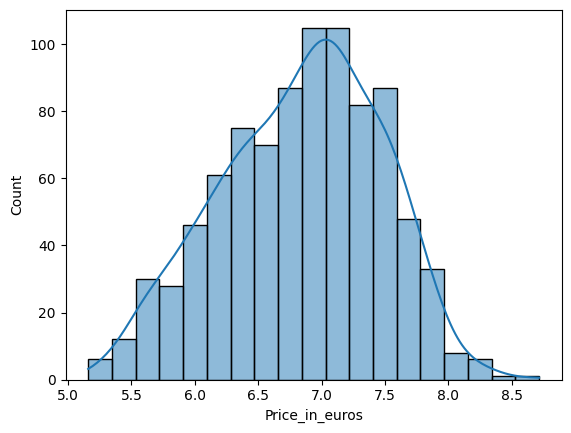

In [423]:
sns.histplot(np.log(df['Price_in_euros']), kde = True)

## Modelado

### 1. Definir X e y

In [424]:
# X = df.drop(['Price_in_euros'], axis=1)
# y = df[].copy()
# X.shape

In [425]:
cat_cols = ['Company', 'TypeName', 'Storage_Type', 'OpSys','gpu_brand'] # 'Cpu_brand'
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int) #

In [426]:
df_encoded

,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_in_euros,touchscreen,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,gpu_brand_Intel,gpu_brand_Nvidia
755,250 G6,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,1.86kg,539.00,0,...,0,0,0,0,1,0,0,0,1,0
618,Inspiron 7559,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,2.59kg,879.01,0,...,0,0,0,0,1,0,0,0,0,1
909,ProBook 450,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,2.04kg,900.00,0,...,0,0,0,0,1,0,0,0,0,1
2,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,898.94,0,...,0,0,0,0,0,0,0,1,1,0
286,Inspiron 3567,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,2.25kg,428.00,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Inspiron 5570,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,2.2kg,800.00,0,...,0,0,0,0,1,0,0,0,0,0
1160,Spectre Pro,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,1.48kg,1629.00,1,...,0,0,0,0,1,0,0,0,1,0
78,IdeaPad 320-15IKBN,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,2.2kg,519.00,0,...,0,0,0,1,0,0,0,0,1,0
23,255 G6,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,1.86kg,258.00,0,...,0,0,0,1,0,0,0,0,0,0


In [427]:
df_encoded.columns

Index(['Product', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu',
       'Weight', 'Price_in_euros', 'touchscreen', 'FullHD', 'Ips', 'cpu_ghz',
       'SSD_GB', 'HDD_GB', 'Flash_GB', 'Total_Storage_GB', 'inches', 'ram_gb',
       'weight_kg', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_OthersCompany', 'Company_Razer', 'Company_Toshiba',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'Storage_Type_HDD',
       'Storage_Type_SSD', 'Storage_Type_SSD+HDD', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS',
       'gpu_brand_Intel', 'gpu_brand_Nvidia'],
      dtype='object')

In [428]:
features_select = ['touchscreen', 'FullHD', 'Ips',
       'cpu_ghz', 'SSD_GB', 'HDD_GB', 'Flash_GB', 'Total_Storage_GB', 'inches',
       'ram_gb', 'weight_kg', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_OthersCompany', 'Company_Razer', 'Company_Toshiba',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'Storage_Type_HDD',
       'Storage_Type_SSD', 'Storage_Type_SSD+HDD', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS',
       'gpu_brand_Intel', 'gpu_brand_Nvidia']

In [429]:
X = df_encoded[features_select]
y = df['Price_in_euros']

In [430]:
card_tipo(X)

,Card,%_Card,Tipo,tipo_sugerido
touchscreen,2,0.224467,int64,Binaria
FullHD,2,0.224467,int64,Binaria
Ips,2,0.224467,int64,Binaria
cpu_ghz,25,2.805836,float64,Numerica discreta
SSD_GB,13,1.459035,float64,Numerica discreta
HDD_GB,8,0.897868,float64,Categorica
Flash_GB,7,0.785634,float64,Categorica
Total_Storage_GB,24,2.693603,float64,Numerica discreta
inches,17,1.907969,float64,Numerica discreta
ram_gb,9,1.010101,int64,Categorica


In [431]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: Price_in_euros, Length: 891, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [433]:
#len(X_train.describe().T.index.tolist())

In [434]:
#  # Scale numerical features
# num_cols = ['inches', 'ram_gb', 'weight_kg', 'SSD_GB', 'HDD_GB', 'Flash_GB', 'Total_Storage_GB']
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [435]:
 # Scale numerical features
# num_cols = X_train.describe().T.index.tolist()
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [436]:
X_train

,touchscreen,FullHD,Ips,cpu_ghz,SSD_GB,HDD_GB,Flash_GB,Total_Storage_GB,inches,ram_gb,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,gpu_brand_Intel,gpu_brand_Nvidia
112,0,1,1,2.7,256.0,0.0,0.0,256.0,14.0,8,...,0,0,0,0,1,0,0,0,1,0
13,0,0,1,2.8,256.0,0.0,0.0,256.0,15.4,16,...,0,0,0,0,0,0,0,1,0,0
1190,0,0,0,1.6,0.0,500.0,0.0,500.0,15.6,4,...,0,0,0,0,1,0,0,0,1,0
55,0,0,0,2.4,0.0,1000.0,0.0,1000.0,15.6,4,...,0,0,0,0,1,0,0,0,1,0
1043,0,1,0,2.5,256.0,0.0,0.0,256.0,17.3,8,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,1.6,0.0,2000.0,0.0,2000.0,14.0,8,...,0,0,0,0,1,0,0,0,1,0
336,0,1,0,2.8,256.0,1000.0,0.0,1256.0,17.3,8,...,0,0,0,0,1,0,0,0,0,1
20,1,1,1,1.6,128.0,0.0,0.0,128.0,13.3,8,...,0,0,0,0,1,0,0,0,1,0
876,0,1,0,2.3,0.0,500.0,0.0,500.0,15.6,4,...,0,0,0,0,1,0,0,0,1,0


In [437]:
X_train.describe()

,touchscreen,FullHD,Ips,cpu_ghz,SSD_GB,HDD_GB,Flash_GB,Total_Storage_GB,inches,ram_gb,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,gpu_brand_Intel,gpu_brand_Nvidia
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.117978,0.647472,0.264045,2.280253,180.123596,402.585674,5.617978,588.327247,15.001685,8.199438,...,0.029494,0.054775,0.008427,0.053371,0.801966,0.005618,0.032303,0.011236,0.547753,0.317416
std,0.322808,0.478093,0.441133,0.522584,183.978065,506.465778,32.680357,464.840963,1.461199,4.937824,...,0.169307,0.227701,0.091475,0.224930,0.398798,0.074795,0.176929,0.105477,0.498064,0.465798
min,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,1.000000,10.100000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,256.000000,14.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,2.500000,154.000000,0.000000,0.000000,500.000000,15.600000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,2.700000,256.000000,1000.000000,0.000000,1000.000000,15.600000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,3.600000,1000.000000,2000.000000,512.000000,2512.000000,18.400000,64.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [438]:
y_train

112     1480.00
13      2439.97
1190     369.00
55       384.00
1043    1080.00
         ...   
578      389.00
336     1199.00
20       979.00
876      910.00
418     1943.00
Name: Price_in_euros, Length: 712, dtype: float64

### 3. Baseline de modelos


In [439]:
# Train models
models = {
        'RF': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGB': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    }
    
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
        
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        #'R2': r2_score(y_test, y_pred),
        'Feature_Importance': pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
        }

In [440]:
results

{'RF': {'RMSE': np.float64(310.8943294915842),
  'Feature_Importance':                   feature  importance
  9                  ram_gb    0.523102
  10              weight_kg    0.093511
  23      TypeName_Notebook    0.082640
  3                 cpu_ghz    0.072316
  4                  SSD_GB    0.044439
  8                  inches    0.033976
  25   TypeName_Workstation    0.020562
  1                  FullHD    0.015527
  35        OpSys_Windows 7    0.012865
  19          Company_Razer    0.011588
  7        Total_Storage_GB    0.011179
  0             touchscreen    0.009350
  26       Storage_Type_HDD    0.007322
  12           Company_Asus    0.006703
  33       OpSys_Windows 10    0.006378
  2                     Ips    0.005940
  15         Company_Lenovo    0.005833
  14             Company_HP    0.004502
  13           Company_Dell    0.004081
  5                  HDD_GB    0.003502
  37        gpu_brand_Intel    0.002948
  16            Company_MSI    0.002912
  28   Stor

In [441]:
from sklearn.model_selection import GridSearchCV # o en caso de tener un grid muy grande -> RandozimedSearchCV

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Definir los hiperparámetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
RMSE = root_mean_squared_error(y_test, y_pred)

#print(f"MAE: {mae:.2f}")
print(f"RMSE: {RMSE:.2f}")

Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
RMSE: 277.33


In [442]:
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.7}

In [443]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [444]:
#y_pred = RFmodel.predict(X_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [445]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

np.float64(277.32967378777164)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [446]:
X_pred = pd.read_csv("./data/test.csv", index_col=0)
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [447]:
X_pred.index.name = None

In [448]:
X_pred.loc[X_pred['Company'].isin(brands), 'Company'] = 'OthersCompany'

In [449]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)
X_pred['cpu_ghz'] = (X_pred['Cpu'].apply(lambda x :"" .join(x.split()[-1]))).str.replace('GHz', '').astype(float)
X_pred['gpu_brand']  = X_pred['Gpu'].apply(lambda x:x.split()[0])


In [450]:
X_pred['FullHD'] = X_pred['ScreenResolution'].apply(lambda x:1 if "Full HD" in x else 0)

In [451]:
# X_pred['CpuName'] = X_pred['Cpu'].apply(lambda x :" " .join(x.split()[:3]))
# X_pred['Cpu_brand'] = X_pred['CpuName'].apply(nombre_processor)

In [452]:
X_pred['touchscreen'] = X_pred['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

In [453]:
X_pred['Ips'] = X_pred['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [454]:
X_pred = process_storage(X_pred)

In [455]:

X_pred = pd.get_dummies(X_pred, columns=cat_cols, drop_first=True, dtype=int) #

In [456]:
missing_cols = set(X_train.columns) - set(X_pred.columns)  # Columnas faltantes
missing_cols


{'OpSys_Chrome OS'}

In [457]:
for col in missing_cols:
    X_pred[col] = 0 

In [458]:
X_pred = X_pred[features_select]

In [459]:
X_pred.tail()

,touchscreen,FullHD,Ips,cpu_ghz,SSD_GB,HDD_GB,Flash_GB,Total_Storage_GB,inches,ram_gb,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,gpu_brand_Intel,gpu_brand_Nvidia
820,0,1,0,2.8,512.0,1000.0,0.0,1512.0,17.3,16,...,0,0,0,0,1,0,0,0,0,1
948,0,1,1,2.3,128.0,0.0,0.0,128.0,14.0,4,...,0,0,0,0,1,0,0,0,1,0
483,0,1,0,2.8,256.0,0.0,0.0,256.0,15.6,8,...,0,0,0,0,1,0,0,0,0,1
1017,0,0,0,2.5,0.0,500.0,0.0,500.0,14.0,4,...,0,0,0,0,1,0,0,0,1,0
421,1,1,1,2.5,256.0,0.0,0.0,256.0,13.3,8,...,0,0,0,0,1,0,0,0,1,0


In [460]:
# Scale numerical features
# num_cols = num_cols = X_train.describe().T.index.tolist()
# scaler = StandardScaler()
# X_pred[num_cols] = scaler.fit_transform(X_pred[num_cols])


In [461]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   touchscreen            391 non-null    int64  
 1   FullHD                 391 non-null    int64  
 2   Ips                    391 non-null    int64  
 3   cpu_ghz                391 non-null    float64
 4   SSD_GB                 391 non-null    float64
 5   HDD_GB                 391 non-null    float64
 6   Flash_GB               391 non-null    float64
 7   Total_Storage_GB       391 non-null    float64
 8   inches                 391 non-null    float64
 9   ram_gb                 391 non-null    int64  
 10  weight_kg              391 non-null    float64
 11  Company_Apple          391 non-null    int64  
 12  Company_Asus           391 non-null    int64  
 13  Company_Dell           391 non-null    int64  
 14  Company_HP             391 non-null    int64  
 15  Company_L

 ## 2. Replicar el procesado para ``test.csv``

In [462]:
X_pred

,touchscreen,FullHD,Ips,cpu_ghz,SSD_GB,HDD_GB,Flash_GB,Total_Storage_GB,inches,ram_gb,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,gpu_brand_Intel,gpu_brand_Nvidia
209,0,1,0,2.8,512.0,0.0,0.0,512.0,15.6,16,...,0,0,0,1,0,0,0,0,0,1
1281,0,0,0,1.6,0.0,500.0,0.0,500.0,15.6,4,...,0,1,0,0,0,0,0,0,1,0
1168,0,0,0,2.0,0.0,1000.0,0.0,1000.0,15.6,4,...,0,0,0,1,0,0,0,0,1,0
1231,1,1,1,2.5,256.0,0.0,0.0,256.0,15.6,8,...,0,0,0,0,1,0,0,0,1,0
1020,0,1,0,2.5,256.0,0.0,0.0,256.0,14.0,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,0,1,0,2.8,512.0,1000.0,0.0,1512.0,17.3,16,...,0,0,0,0,1,0,0,0,0,1
948,0,1,1,2.3,128.0,0.0,0.0,128.0,14.0,4,...,0,0,0,0,1,0,0,0,1,0
483,0,1,0,2.8,256.0,0.0,0.0,256.0,15.6,8,...,0,0,0,0,1,0,0,0,0,1
1017,0,0,0,2.5,0.0,500.0,0.0,500.0,14.0,4,...,0,0,0,0,1,0,0,0,1,0


In [463]:
predictions_submit = best_model.predict(X_pred)
predictions_submit

array([1586.1709 ,  312.29773,  352.10883, 1018.26385, 1130.6228 ,
        554.0021 ,  804.5266 , 1011.478  , 1253.6683 ,  342.47168,
       2656.2595 , 1429.2462 ,  440.0238 , 2074.1619 ,  889.0497 ,
        700.24915, 1993.973  , 1384.9739 , 1981.8384 ,  616.8795 ,
       1200.0437 ,  353.248  ,  737.2104 , 1115.891  ,  479.15594,
        701.87933,  584.7033 ,  569.7618 , 2423.132  , 1067.054  ,
       2189.0193 ,  364.58908,  872.32434, 2719.75   , 2268.429  ,
       2036.7762 ,  614.9612 , 1372.2509 ,  900.3966 , 1646.6418 ,
        739.46655,  839.1016 ,  546.63165, 1302.4554 , 1242.1904 ,
       1093.4097 , 1209.9672 ,  704.3883 ,  677.3504 ,  500.58224,
       1987.5809 ,  729.2099 , 1142.9398 ,  670.58295, 1491.7957 ,
       1780.9469 ,  627.15094,  825.96075,  965.07043,  735.57825,
       2909.7664 , 1669.7023 ,  489.66437, 1997.0908 , 1437.4763 ,
       1488.8333 , 1089.9471 , 1246.4398 , 1807.4183 , 2041.0092 ,
        757.80597,  445.69244, 1061.9556 , 1780.8027 ,  997.95

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [464]:
# ¿Qué opináis?
# ¿Sí, no?

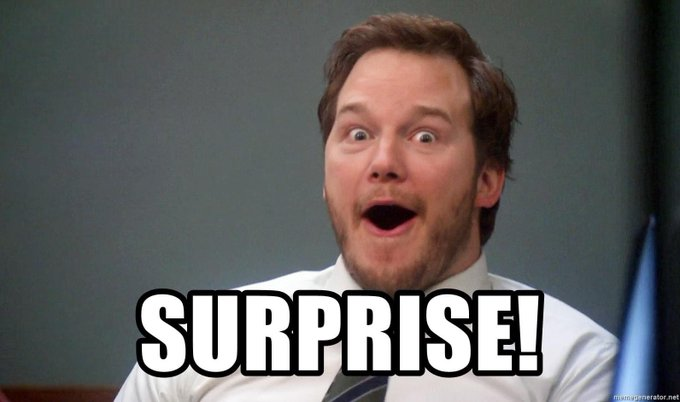

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [465]:
sample = pd.read_csv("data/sample_submission.csv")

In [466]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [467]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [468]:
#¿Cómo creamos la submission?
submissionV6 = pd.DataFrame({'laptop_ID': X_pred.index, 'Price_in_euros': predictions_submit})

In [469]:
submissionV6.head()

,laptop_ID,Price_in_euros
0,209,1586.170898
1,1281,312.297729
2,1168,352.108826
3,1231,1018.263855
4,1020,1130.622803


In [470]:
submissionV6.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [471]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submissionV6.to_csv("submissionV6.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [472]:
chequeador(submissionV6)

You're ready to submit!


features num no escaladas

features cat get.dummies

Busqueda de best model entre RandomForest y Xgboost

mejor Xgboost 
busqueda de mejores paramestos con gridSearc



TRANSFORMACIONES

In [ ]:
df.index.name = None

#DROP Product
df.drop('Product', axis= 1, inplace = True)

#Ordinal Encoder Company
#brands = df.Company.value_counts()[df.Company.value_counts() <= 5].index
#df.loc[df['Company'].isin(brands), 'Company'] = 'OthersCompany'
Company_order = df.groupby('Company')['Price_in_euros'].mean().sort_values().index.tolist()
# Aplicar OrdinalEncoder con categorías en el orden definido
encoder_company = OrdinalEncoder(categories=[Company_order])
df['company_encoded'] = encoder_company.fit_transform(df[['Company']])

#Ordinal Encoder TypeName
type_order = df.groupby('TypeName')['Price_in_euros'].mean().sort_values().index.tolist()
# Aplicar OrdinalEncoder con categorías en el orden definido
encoder_tipo = OrdinalEncoder(categories=[type_order])
df['Tipo_encoded'] = encoder_tipo.fit_transform(df[['TypeName']])

df["inches"] = df.Inches.astype(float)

#Transformacion ScreenResolution
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)
df['FullHD'] = df['ScreenResolution'].apply(lambda x:1 if "Full HD" in x else 0)
df['ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

#Transformacion Cpu
#df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))
df['CpuName1'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:1]))
df['cpu_ghz'] = (df['Cpu'].apply(lambda x :"" .join(x.split()[-1]))).str.replace('GHz', '').astype(float)
df['Cpu_brand'] = df['CpuName'].apply(nombre_processor)

df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)

df['gpu_brand']  = df['Gpu'].apply(lambda x:x.split()[0])

# funcion process_storage transforma la columna memory
df = process_storage(df)   # df con la columna storage transformada en 4 columnas que tienen en cuenta el total de GB de storage

#Ordinal Encoder OpSys
OS_order = df.groupby('OpSys')['Price_in_euros'].mean().sort_values().index.tolist()
encoder_OS = OrdinalEncoder(categories=[OS_order])
df['OS_encoded'] = encoder_OS.fit_transform(df[['OpSys']])

df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)